In [29]:
import pandas as pd

df = pd.read_csv("../data/cleaned.csv")
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [30]:
df["BalanceToSalary"] = df["Balance"] / df["EstimatedSalary"]
df["CreditScorePerAge"] = df["CreditScore"] / df["Age"]
df["ProductsPerTenure"] = df["NumOfProducts"] / (df["Tenure"].replace(0, 1))
df["PointsPerProduct"] = df["Point Earned"] / (df["NumOfProducts"].replace(0, 1))
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,BalanceToSalary,CreditScorePerAge,ProductsPerTenure,PointsPerProduct
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0.000000,14.738095,0.500000,464.000000
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,0.744677,14.829268,1.000000,456.000000
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1.401375,11.952381,0.375000,125.666667
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,0.000000,17.923077,2.000000,175.000000
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1.587055,19.767442,0.500000,425.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,0.000000,19.769231,0.400000,150.000000
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,0.564108,14.742857,0.100000,771.000000
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,0.000000,19.694444,0.142857,564.000000
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,0.808230,18.380952,0.666667,169.500000


In [31]:
df_by_geo = df.groupby("Geography").agg(AvgSalaryByGeo=("EstimatedSalary", "mean"), MedSalaryByGeo=("EstimatedSalary", "median"))
df_by_geo

,AvgSalaryByGeo,MedSalaryByGeo
Geography,,
France,99899.180814,99132.31
Germany,101113.435102,102397.22
Spain,99440.572281,99984.86


In [32]:
df = pd.merge(df, df_by_geo, "left", "Geography")
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Complain,Satisfaction Score,Card Type,Point Earned,BalanceToSalary,CreditScorePerAge,ProductsPerTenure,PointsPerProduct,AvgSalaryByGeo,MedSalaryByGeo
0,15634602,619,France,Female,42,2,0.00,1,1,1,...,1,2,DIAMOND,464,0.000000,14.738095,0.500000,464.000000,99899.180814,99132.31
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,...,1,3,DIAMOND,456,0.744677,14.829268,1.000000,456.000000,99440.572281,99984.86
2,15619304,502,France,Female,42,8,159660.80,3,1,0,...,1,3,DIAMOND,377,1.401375,11.952381,0.375000,125.666667,99899.180814,99132.31
3,15701354,699,France,Female,39,1,0.00,2,0,0,...,0,5,GOLD,350,0.000000,17.923077,2.000000,175.000000,99899.180814,99132.31
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,...,0,5,GOLD,425,1.587055,19.767442,0.500000,425.000000,99440.572281,99984.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,...,0,1,DIAMOND,300,0.000000,19.769231,0.400000,150.000000,99899.180814,99132.31
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,...,0,5,PLATINUM,771,0.564108,14.742857,0.100000,771.000000,99899.180814,99132.31
9997,15584532,709,France,Female,36,7,0.00,1,0,1,...,1,3,SILVER,564,0.000000,19.694444,0.142857,564.000000,99899.180814,99132.31
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,...,1,2,GOLD,339,0.808230,18.380952,0.666667,169.500000,101113.435102,102397.22


<Axes: >

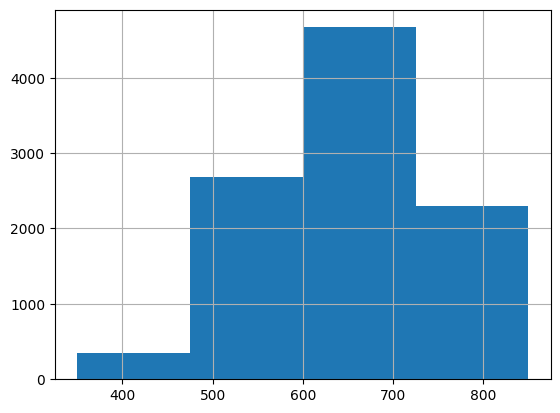

In [33]:
df["CreditScore"].hist(bins=4)

In [34]:
def credit_score_bin(score):
    if score <= 500:
        return 0
    elif score <= 600:
        return 1
    elif score <= 700:
        return 2
    else:
        return 3

df["CreditScoreBin"] = df["CreditScore"].apply(credit_score_bin)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Satisfaction Score,Card Type,Point Earned,BalanceToSalary,CreditScorePerAge,ProductsPerTenure,PointsPerProduct,AvgSalaryByGeo,MedSalaryByGeo,CreditScoreBin
0,15634602,619,France,Female,42,2,0.00,1,1,1,...,2,DIAMOND,464,0.000000,14.738095,0.500000,464.000000,99899.180814,99132.31,2
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,...,3,DIAMOND,456,0.744677,14.829268,1.000000,456.000000,99440.572281,99984.86,2
2,15619304,502,France,Female,42,8,159660.80,3,1,0,...,3,DIAMOND,377,1.401375,11.952381,0.375000,125.666667,99899.180814,99132.31,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,...,5,GOLD,350,0.000000,17.923077,2.000000,175.000000,99899.180814,99132.31,2
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,...,5,GOLD,425,1.587055,19.767442,0.500000,425.000000,99440.572281,99984.86,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,...,1,DIAMOND,300,0.000000,19.769231,0.400000,150.000000,99899.180814,99132.31,3
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,...,5,PLATINUM,771,0.564108,14.742857,0.100000,771.000000,99899.180814,99132.31,1
9997,15584532,709,France,Female,36,7,0.00,1,0,1,...,3,SILVER,564,0.000000,19.694444,0.142857,564.000000,99899.180814,99132.31,3
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,...,2,GOLD,339,0.808230,18.380952,0.666667,169.500000,101113.435102,102397.22,3


In [35]:
df["LoyaltyIndex"] = (df["IsActiveMember"] * 4) + (df["HasCrCard"] * 2) + df["NumOfProducts"]
df["SatisfactionDrop"] = (df["Satisfaction Score"] < df["Satisfaction Score"].mean()).astype(int)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Point Earned,BalanceToSalary,CreditScorePerAge,ProductsPerTenure,PointsPerProduct,AvgSalaryByGeo,MedSalaryByGeo,CreditScoreBin,LoyaltyIndex,SatisfactionDrop
0,15634602,619,France,Female,42,2,0.00,1,1,1,...,464,0.000000,14.738095,0.500000,464.000000,99899.180814,99132.31,2,7,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,...,456,0.744677,14.829268,1.000000,456.000000,99440.572281,99984.86,2,5,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,...,377,1.401375,11.952381,0.375000,125.666667,99899.180814,99132.31,1,5,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,...,350,0.000000,17.923077,2.000000,175.000000,99899.180814,99132.31,2,2,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,...,425,1.587055,19.767442,0.500000,425.000000,99440.572281,99984.86,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,...,300,0.000000,19.769231,0.400000,150.000000,99899.180814,99132.31,3,4,1
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,...,771,0.564108,14.742857,0.100000,771.000000,99899.180814,99132.31,1,7,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,...,564,0.000000,19.694444,0.142857,564.000000,99899.180814,99132.31,3,5,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,...,339,0.808230,18.380952,0.666667,169.500000,101113.435102,102397.22,3,4,1


In [36]:
df["HighBalanceLowProduct"] = ((df["Balance"] > df["Balance"].median()) & (df["NumOfProducts"] == 1)).astype(int)
df["HighSalary"] = (df["EstimatedSalary"] > df["MedSalaryByGeo"]).astype(int)
df["InactiveHighValue"] = ((df["Balance"] > df["Balance"].median()) & (df["IsActiveMember"] == 0)).astype(int)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,ProductsPerTenure,PointsPerProduct,AvgSalaryByGeo,MedSalaryByGeo,CreditScoreBin,LoyaltyIndex,SatisfactionDrop,HighBalanceLowProduct,HighSalary,InactiveHighValue
0,15634602,619,France,Female,42,2,0.00,1,1,1,...,0.500000,464.000000,99899.180814,99132.31,2,7,1,0,1,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,...,1.000000,456.000000,99440.572281,99984.86,2,5,1,0,1,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,...,0.375000,125.666667,99899.180814,99132.31,1,5,1,0,1,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,...,2.000000,175.000000,99899.180814,99132.31,2,2,0,0,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,...,0.500000,425.000000,99440.572281,99984.86,3,7,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,...,0.400000,150.000000,99899.180814,99132.31,3,4,1,0,0,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,...,0.100000,771.000000,99899.180814,99132.31,1,7,0,0,1,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,...,0.142857,564.000000,99899.180814,99132.31,3,5,1,0,0,0
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,...,0.666667,169.500000,101113.435102,102397.22,3,4,1,0,0,0


In [37]:
df = df.drop("MedSalaryByGeo", axis=1)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,CreditScorePerAge,ProductsPerTenure,PointsPerProduct,AvgSalaryByGeo,CreditScoreBin,LoyaltyIndex,SatisfactionDrop,HighBalanceLowProduct,HighSalary,InactiveHighValue
0,15634602,619,France,Female,42,2,0.00,1,1,1,...,14.738095,0.500000,464.000000,99899.180814,2,7,1,0,1,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,...,14.829268,1.000000,456.000000,99440.572281,2,5,1,0,1,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,...,11.952381,0.375000,125.666667,99899.180814,1,5,1,0,1,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,...,17.923077,2.000000,175.000000,99899.180814,2,2,0,0,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,...,19.767442,0.500000,425.000000,99440.572281,3,7,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,...,19.769231,0.400000,150.000000,99899.180814,3,4,1,0,0,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,...,14.742857,0.100000,771.000000,99899.180814,1,7,0,0,1,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,...,19.694444,0.142857,564.000000,99899.180814,3,5,1,0,0,0
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,...,18.380952,0.666667,169.500000,101113.435102,3,4,1,0,0,0


In [38]:
df_geo = pd.get_dummies(df["Geography"]).astype(int)
df_geo

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [39]:
df = pd.concat([df, df_geo], axis=1)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,AvgSalaryByGeo,CreditScoreBin,LoyaltyIndex,SatisfactionDrop,HighBalanceLowProduct,HighSalary,InactiveHighValue,France,Germany,Spain
0,15634602,619,France,Female,42,2,0.00,1,1,1,...,99899.180814,2,7,1,0,1,0,1,0,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,...,99440.572281,2,5,1,0,1,0,0,0,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,...,99899.180814,1,5,1,0,1,1,1,0,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,...,99899.180814,2,2,0,0,0,0,1,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,...,99440.572281,3,7,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,...,99899.180814,3,4,1,0,0,0,1,0,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,...,99899.180814,1,7,0,0,1,0,1,0,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,...,99899.180814,3,5,1,0,0,0,1,0,0
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,...,101113.435102,3,4,1,0,0,0,0,1,0


In [40]:
df = df.drop("Geography", axis=1)
df

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,AvgSalaryByGeo,CreditScoreBin,LoyaltyIndex,SatisfactionDrop,HighBalanceLowProduct,HighSalary,InactiveHighValue,France,Germany,Spain
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,...,99899.180814,2,7,1,0,1,0,1,0,0
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,...,99440.572281,2,5,1,0,1,0,0,0,1
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,...,99899.180814,1,5,1,0,1,1,1,0,0
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,...,99899.180814,2,2,0,0,0,0,1,0,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,...,99440.572281,3,7,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Male,39,5,0.00,2,1,0,96270.64,...,99899.180814,3,4,1,0,0,0,1,0,0
9996,15569892,516,Male,35,10,57369.61,1,1,1,101699.77,...,99899.180814,1,7,0,0,1,0,1,0,0
9997,15584532,709,Female,36,7,0.00,1,0,1,42085.58,...,99899.180814,3,5,1,0,0,0,1,0,0
9998,15682355,772,Male,42,3,75075.31,2,1,0,92888.52,...,101113.435102,3,4,1,0,0,0,0,1,0


In [41]:
df["Gender"] = (df["Gender"] == "Male").astype(int)
card_types = ["SILVER", "GOLD", "DIAMOND", "PLATINUM"]
df["Card Type"] = df["Card Type"].apply(lambda card: card_types.index(card))
df

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,AvgSalaryByGeo,CreditScoreBin,LoyaltyIndex,SatisfactionDrop,HighBalanceLowProduct,HighSalary,InactiveHighValue,France,Germany,Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,...,99899.180814,2,7,1,0,1,0,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,...,99440.572281,2,5,1,0,1,0,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,...,99899.180814,1,5,1,0,1,1,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,...,99899.180814,2,2,0,0,0,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,...,99440.572281,3,7,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,2,1,0,96270.64,...,99899.180814,3,4,1,0,0,0,1,0,0
9996,15569892,516,1,35,10,57369.61,1,1,1,101699.77,...,99899.180814,1,7,0,0,1,0,1,0,0
9997,15584532,709,0,36,7,0.00,1,0,1,42085.58,...,99899.180814,3,5,1,0,0,0,1,0,0
9998,15682355,772,1,42,3,75075.31,2,1,0,92888.52,...,101113.435102,3,4,1,0,0,0,0,1,0


In [45]:
from sklearn.preprocessing import MinMaxScaler

scaled_cols = [
    "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Satisfaction Score", "Card Type", "Point Earned", "BalanceToSalary", "CreditScorePerAge",
    "ProductsPerTenure", "PointsPerProduct", "AvgSalaryByGeo", "CreditScoreBin", "LoyaltyIndex"
]

mms = MinMaxScaler()
df_scaled = pd.DataFrame(mms.fit_transform(df[scaled_cols]), columns=scaled_cols)
df_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,BalanceToSalary,CreditScorePerAge,ProductsPerTenure,PointsPerProduct,AvgSalaryByGeo,CreditScoreBin,LoyaltyIndex
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.25,0.666667,0.391600,0.000000,0.235083,0.102564,0.431752,0.274146,0.666667,0.666667
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.50,0.666667,0.382520,0.000070,0.237252,0.230769,0.423271,0.000000,0.666667,0.444444
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.50,0.666667,0.292849,0.000132,0.168807,0.070513,0.073063,0.274146,0.333333,0.444444
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,1.00,0.333333,0.262202,0.000000,0.310859,0.487179,0.125364,0.274146,0.666667,0.111111
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,1.00,0.333333,0.347333,0.000150,0.354739,0.102564,0.390406,0.000000,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,0.481341,0.00,0.666667,0.205448,0.000000,0.354782,0.076923,0.098860,0.274146,1.000000,0.333333
9996,0.332,0.229730,1.0,0.228657,0.000000,0.508490,1.00,1.000000,0.740068,0.000053,0.235196,0.000000,0.757222,0.274146,0.333333,0.666667
9997,0.718,0.243243,0.7,0.000000,0.000000,0.210390,0.50,0.000000,0.505108,0.000000,0.353002,0.010989,0.537768,0.274146,1.000000,0.444444
9998,0.844,0.324324,0.3,0.299226,0.333333,0.464429,0.25,0.333333,0.249716,0.000076,0.321752,0.145299,0.119534,1.000000,1.000000,0.333333


In [46]:
df_non_scaled = df.drop(scaled_cols, axis=1)
df_non_scaled

,CustomerId,Gender,HasCrCard,IsActiveMember,Exited,Complain,SatisfactionDrop,HighBalanceLowProduct,HighSalary,InactiveHighValue,France,Germany,Spain
0,15634602,0,1,1,1,1,1,0,1,0,1,0,0
1,15647311,0,0,1,0,1,1,0,1,0,0,0,1
2,15619304,0,1,0,1,1,1,0,1,1,1,0,0
3,15701354,0,0,0,0,0,0,0,0,0,1,0,0
4,15737888,0,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,1,0,0,0,1,0,0,0,1,0,0
9996,15569892,1,1,1,0,0,0,0,1,0,1,0,0
9997,15584532,0,0,1,1,1,1,0,0,0,1,0,0
9998,15682355,1,1,0,1,1,1,0,0,0,0,1,0


In [48]:
df = pd.concat([df_non_scaled, df_scaled], axis=1)
df

,CustomerId,Gender,HasCrCard,IsActiveMember,Exited,Complain,SatisfactionDrop,HighBalanceLowProduct,HighSalary,InactiveHighValue,...,Satisfaction Score,Card Type,Point Earned,BalanceToSalary,CreditScorePerAge,ProductsPerTenure,PointsPerProduct,AvgSalaryByGeo,CreditScoreBin,LoyaltyIndex
0,15634602,0,1,1,1,1,1,0,1,0,...,0.25,0.666667,0.391600,0.000000,0.235083,0.102564,0.431752,0.274146,0.666667,0.666667
1,15647311,0,0,1,0,1,1,0,1,0,...,0.50,0.666667,0.382520,0.000070,0.237252,0.230769,0.423271,0.000000,0.666667,0.444444
2,15619304,0,1,0,1,1,1,0,1,1,...,0.50,0.666667,0.292849,0.000132,0.168807,0.070513,0.073063,0.274146,0.333333,0.444444
3,15701354,0,0,0,0,0,0,0,0,0,...,1.00,0.333333,0.262202,0.000000,0.310859,0.487179,0.125364,0.274146,0.666667,0.111111
4,15737888,0,1,1,0,0,0,1,0,0,...,1.00,0.333333,0.347333,0.000150,0.354739,0.102564,0.390406,0.000000,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,1,0,0,0,1,0,0,0,...,0.00,0.666667,0.205448,0.000000,0.354782,0.076923,0.098860,0.274146,1.000000,0.333333
9996,15569892,1,1,1,0,0,0,0,1,0,...,1.00,1.000000,0.740068,0.000053,0.235196,0.000000,0.757222,0.274146,0.333333,0.666667
9997,15584532,0,0,1,1,1,1,0,0,0,...,0.50,0.000000,0.505108,0.000000,0.353002,0.010989,0.537768,0.274146,1.000000,0.444444
9998,15682355,1,1,0,1,1,1,0,0,0,...,0.25,0.333333,0.249716,0.000076,0.321752,0.145299,0.119534,1.000000,1.000000,0.333333


In [49]:
df.to_csv("../data/features.csv", index=False)
pd.read_csv("../data/features.csv")

,CustomerId,Gender,HasCrCard,IsActiveMember,Exited,Complain,SatisfactionDrop,HighBalanceLowProduct,HighSalary,InactiveHighValue,...,Satisfaction Score,Card Type,Point Earned,BalanceToSalary,CreditScorePerAge,ProductsPerTenure,PointsPerProduct,AvgSalaryByGeo,CreditScoreBin,LoyaltyIndex
0,15634602,0,1,1,1,1,1,0,1,0,...,0.25,0.666667,0.391600,0.000000,0.235083,0.102564,0.431752,0.274146,0.666667,0.666667
1,15647311,0,0,1,0,1,1,0,1,0,...,0.50,0.666667,0.382520,0.000070,0.237252,0.230769,0.423271,0.000000,0.666667,0.444444
2,15619304,0,1,0,1,1,1,0,1,1,...,0.50,0.666667,0.292849,0.000132,0.168807,0.070513,0.073063,0.274146,0.333333,0.444444
3,15701354,0,0,0,0,0,0,0,0,0,...,1.00,0.333333,0.262202,0.000000,0.310859,0.487179,0.125364,0.274146,0.666667,0.111111
4,15737888,0,1,1,0,0,0,1,0,0,...,1.00,0.333333,0.347333,0.000150,0.354739,0.102564,0.390406,0.000000,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,1,0,0,0,1,0,0,0,...,0.00,0.666667,0.205448,0.000000,0.354782,0.076923,0.098860,0.274146,1.000000,0.333333
9996,15569892,1,1,1,0,0,0,0,1,0,...,1.00,1.000000,0.740068,0.000053,0.235196,0.000000,0.757222,0.274146,0.333333,0.666667
9997,15584532,0,0,1,1,1,1,0,0,0,...,0.50,0.000000,0.505108,0.000000,0.353002,0.010989,0.537768,0.274146,1.000000,0.444444
9998,15682355,1,1,0,1,1,1,0,0,0,...,0.25,0.333333,0.249716,0.000076,0.321752,0.145299,0.119534,1.000000,1.000000,0.333333
